# Name:-

## Parth Suhas Mane

# QUESTION:
    
For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# ONE:

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
#basic python libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud #WordCloud – library to visualize text data
import re #re – provides functions to pre-process the strings as per the given regular expression


In [3]:
#load the dataset
data=pd.read_csv('Elon_musk.csv',encoding='latin-1',index_col=0)
print(data.shape)
data.head()

(1999, 1)


Text
1                             @kunalb11 Im an alien
2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
3                @joerogan @Spotify Great interview!
4                    @gtera27 Doge is underestimated
5  @teslacn Congratulations Tesla China for amazi...

In [4]:
#check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [5]:
#check null values
data.isnull().sum()

Text    0
dtype: int64

There are no any missing values

In [6]:
#Count of unique texts
data.nunique()

Text    1997
dtype: int64

In [7]:
#check duplicated text
data.duplicated().sum()

2

There are 2 duplicated rows.we wil drop duplicated rows.

In [8]:
#drop duplicated
data.drop_duplicates(inplace=True)

In [9]:
#count Number of words in a single tweet
data['word_count']=data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()


Text  word_count
1                             @kunalb11 Im an alien           4
2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          13
3                @joerogan @Spotify Great interview!           4
4                    @gtera27 Doge is underestimated           4
5  @teslacn Congratulations Tesla China for amazi...          17

### Convert to Lowercase

we will convert the string to lowercase as, the word “Good” is different from the word “good”.

Because, without converting to lowercase, it will cause an issue when we will create vectors of these words, as two different vectors will be created for the same word which we don’t want to.

In [10]:
#convert all text in lower_case
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()


1                               @kunalb11 im an alien
2    @id_aa_carmack ray tracing on cyberpunk with h...
3                  @joerogan @spotify great interview!
4                      @gtera27 doge is underestimated
5    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

### Remove user handles & punctuations

In [11]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()


C:\Users\User\AppData\Local\Temp\ipykernel_18604\1851893108.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


1                                 kunalb11 im an alien
2    id_aa_carmack ray tracing on cyberpunk with hd...
3                     joerogan spotify great interview
4                       gtera27 doge is underestimated
5    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [12]:
#function to remove user handles
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
        
    return input_txt

#Remove user handles
data['clean_text']=data['Text'].apply(lambda row:remove_pattern(row, "@[^\w\s]*"))

#display first five observations
data.head()
    

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  
1                               kunalb11 im an alien  
2  id_aa_carmack ray tracing on cyberpunk with hd...  
3                   joerogan spotify great interview  
4                     gtera27 doge is underestimated  
5  teslacn congratulations tesla china for amazin...

# Performing text preprocessing

In [178]:
!pip install -U textblob

In [16]:
#Natural language processing
import nltk #Natural Language Toolkit is a collection of libraries for natural language processing
from nltk.corpus import stopwords # a collection of words that don’t provide any meaning to a sentence
from nltk.stem import WordNetLemmatizer #used to convert different forms of words into a single item but still keeping the context intact.
from nltk.stem.porter import *

### Tokenization

Tokenization- Tokenization describes splitting paragraphs into sentences, or sentences into individual pieces called tokens. 

In [17]:
# tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]  # Aply list Comprehension
data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  
1                          [kunalb11, im, an, alien]  
2  [id_aa_carmack, ray, tracing, on, cyberpunk, w...  
3              [joerogan, spotify, great, interview]  
4                [gtera27, doge, is, underestimated]  
5  [teslacn, congratulations, tesla, china, for, ...

### Remove stopwards

Then we will check for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

In [18]:
# stopword removal
stop_words = list(set(stopwords.words('english')))

data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])
#word is tempvar like (i)
data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  
1                              [kunalb11, im, alien]  
2  [id_aa_carmack, ray, tracing, cyberpunk, hdr, ...  
3              [joerogan, spotify, great, interview]  
4                    [gtera27, doge, underestimated]  
5  [teslacn, congratulations, tesla, china, amazi...

### Perform Stemming

Then, we will perform stemming on each word,i.e. keep non changing part is called a stemming.

Stemming is basically removing the suffix from a word and reduce it to its root word. For example: “Flying” is a word and its suffix is “ing”, if we remove “ing” from “Flying” then we will get base word or root word which is “Fly”.


In [19]:
# stemming words
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))#this will remove paranthesis,!,etc
data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  
1                                  kunalb11 im alien  
2  id_aa_carmack ray trace cyberpunk hdr nextleve...  
3                   joerogan spotifi great interview  
4                            gtera27 doge underestim  
5  teslacn congratul tesla china amaz execut last...

# Visualizing Tweets

#### WordCloud:
It is a visualisation method that displays how frequently words appear in a given body of text, by making the size of each word proportional to its frequency. All the words are then arranged in a cluster or cloud of words. Alternatively, the words can also be arranged in any format: horizontal lines, columns or within a shape

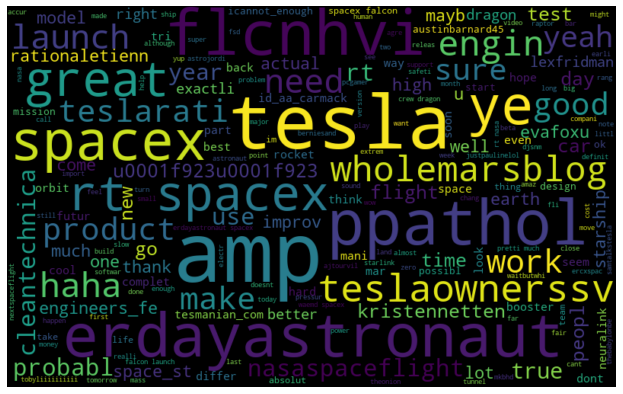

In [20]:
# import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# all the tweets
all_words = ' '.join([text for text in data['tokenized_text']])

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear") #.imshow=Display data as an image, i.e., on a 2D regular raster.

plt.axis('off')
plt.show()

With the help of wordcloud visualization you will observe which words occure frequently throughout the tweets.

### wordcloud visualization for positive tweets


In [21]:
import codecs

In [22]:
#open positive-words txt file which have given
with codecs.open("positive-words.txt", "r", encoding='utf-8') as p:
    positive_words = p.read()
    print(positive_words)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

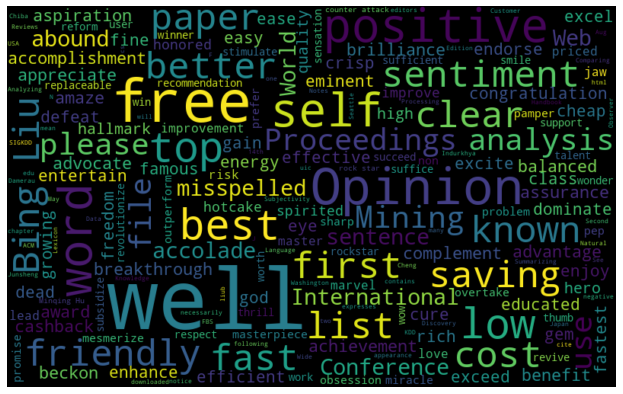

In [23]:
# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

# plot wordcloud of positive words
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear") #.imshow=Display data as an image, i.e., on a 2D regular raster.

plt.axis('off')
plt.show()

As you can see from the visualization words like "better", "well", "positive", "brilliance" , "appereciate" are more prominent throughout positive tweets.

### wordcloud visualization for negative tweets

In [24]:
#open negative-words txt file which have given
with codecs.open("negative-words.txt", "r", encoding='ISO-8859-1') as p:
    negative_words = p.read()
    print(negative_words)
    

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

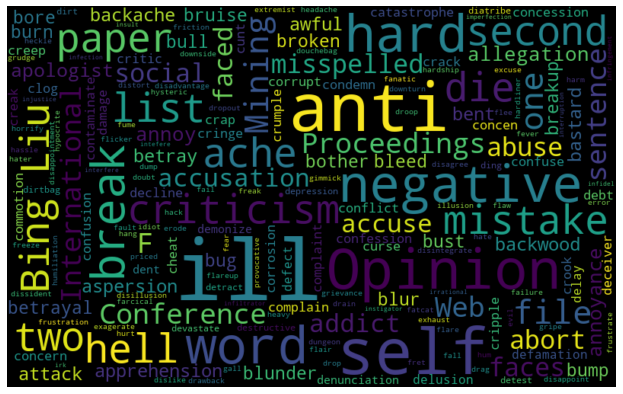

In [25]:
# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

# plot wordcloud for negative words
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear") #.imshow=Display data as an image, i.e., on a 2D regular raster.

plt.axis('off')
plt.show()

As you can see from the visualization words like "bug","blunder", "ill", "break", "mistake" , "hell" are more prominent throughout negative tweets.

# Sentiment Analysis

In [30]:
data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  tb_polarity  vs_polarity  
1                                  kunalb11 im alien        -0.25       0.0000  
2  id_aa_carmack ray trace cyberpunk hdr nextleve...         0.00       0.0000  
3                   joerogan spotifi great interview         0.80       0.6249  
4                            gtera27 doge underestim         0.00       0.0000  
5  teslacn congratul tesla china amaz execut last...         0.00       0.0000

# 1.Sentiment Analysis with TextBlob

Features of TextBlob


The documentation page of TextBlob says; TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.

In [28]:
# import packages
from textblob import TextBlob

# list to store polarities
tb_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:  # here sentence is temp variable
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0]) #.sentiment[0,1]==[polarity,subjectivity]

# new column to store polarity    
data['tb_polarity'] = tb_polarity
data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  tb_polarity  
1                                  kunalb11 im alien        -0.25  
2  id_aa_carmack ray trace cyberpunk hdr nextleve...         0.00  
3                   joerogan spotifi great interview         0.80  
4                            gtera27 doge underestim         0.00  
5  teslacn congratul tesla china amaz execut last...         0.00

Output of TextBlob

You can carry out sentiment analysis with textBlob too. The TextBlob object has an attribute sentiment that returns a tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0] with negative values corresponding to negative sentiments and positive values to positive sentiments. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

#### Visualize Polarity which got by using TextBlob

array([[<AxesSubplot:title={'center':'tb_polarity'}>]], dtype=object)

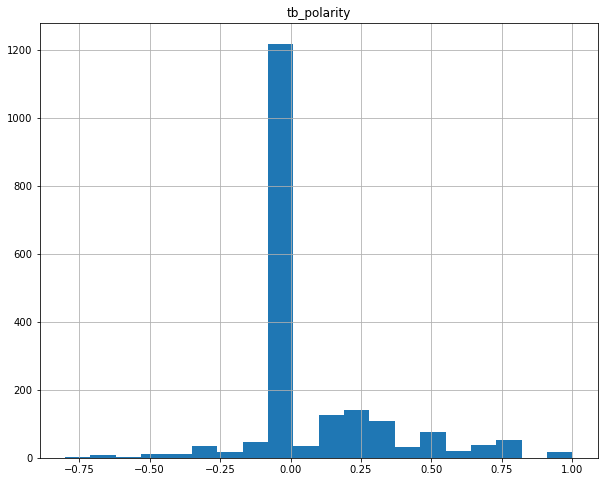

In [32]:
#visualize polarity of TextBlob
data[[ "tb_polarity"]].hist(bins=20, figsize=(10, 8))

#### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

#### TextBlob Polarity is almost Right skewed. The majority polarity is more than zero. That means maximum reviews have a positive sentiment.

# 2.Sentiment Analysis using vaderSentiment library


In [204]:
!pip install vadersentiment

Another library for out of the box sentiment analysis is vaderSentiment. It is an open sourced python library where VADER stands for Valence Aware Dictionary and sEntiment Reasoner.

In [29]:
# import packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize analyser object
analyser = SentimentIntensityAnalyzer()

# empty list to store VADER polarities
vs_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])

# add new column `'vs_polarity'` to data
data['vs_polarity'] = vs_polarity

data.head()

Text  word_count  \
1                               kunalb11 im an alien           4   
2  id_aa_carmack ray tracing on cyberpunk with hd...          13   
3                   joerogan spotify great interview           4   
4                     gtera27 doge is underestimated           4   
5  teslacn congratulations tesla china for amazin...          17   

                                          clean_text  \
1                               kunalb11 im an alien   
2  id_aa_carmack ray tracing on cyberpunk with hd...   
3                   joerogan spotify great interview   
4                     gtera27 doge is underestimated   
5  teslacn congratulations tesla china for amazin...   

                                      tokenized_text  tb_polarity  vs_polarity  
1                                  kunalb11 im alien        -0.25       0.0000  
2  id_aa_carmack ray trace cyberpunk hdr nextleve...         0.00       0.0000  
3                   joerogan spotifi great interview         0.80       0.6249  
4                            gtera27 doge underestim         0.00       0.0000  
5  teslacn congratul tesla china amaz execut last...         0.00       0.0000

Output of VADER

VADER produces four sentiment metrics from these word ratings. The first three metrics; positive, neutral and negative, represent the proportion of the text that falls into those categories. The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1.

#### Visualize Polarity which got by using VADER

array([[<AxesSubplot:title={'center':'vs_polarity'}>]], dtype=object)

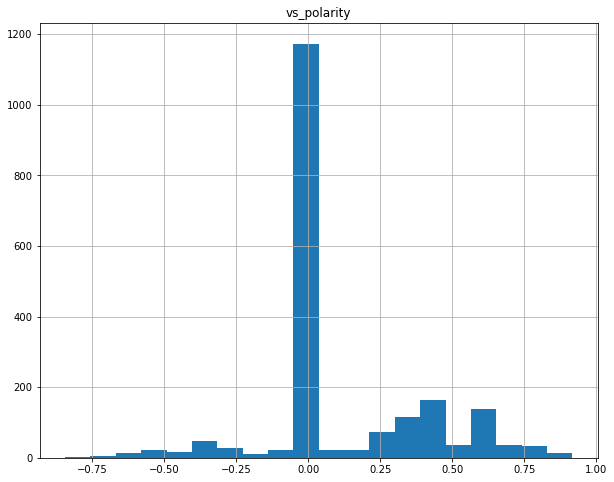

In [34]:
#visualize polarity of VADER
data[[ "vs_polarity"]].hist(bins=20, figsize=(10, 8))

#### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

#### VADER Polarity is almost Right skewed. The majority polarity is more than zero. That means maximum reviews have a positive sentiment.

#### TextBlob & VADER gives almost same Polarity.

# TWO:
        
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# Multi-page web-scraping

In [115]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [116]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

### Looping through multiple pages

In [117]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [118]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [119]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [123]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [136]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                   This is a branded budget phone 📱   
2        4.0                             A mildly perfect phone   
3        4.0                     Budget friendly reliable phone   
4        4.0                    Good phone if you buy under 18K   
...      ...                                                ...   
4995     5.0                                           Good one   
4996     5.0                                         Good phone   
4997     5.0  Good phone with low price but features are all...   
4998     5.0                                    Fantastic phone   
4999     3.0                                       Ok ok normal   

                                                 Review        Review_Date  
0     I've purchased the 6GB version of this phone w...   19 December 2022  
1     This is definitely a budget branded phone 📱 af...     5 January 2023  
2     I will try to keep this review short. This rev...    12 January 2023  
3     I bought the phone in Jan 2023 @ 18250. Below ...    5 February 2023  
4     Performance up to the mark👍, If you do more ga...   26 February 2023  
...                                                 ...                ...  
4995                                       Working good  17 September 2022  
4996  The phone is simply awosem!! If you want a smo...     13 August 2022  
4997                        Good phone with low budget.  11 September 2022  
4998  Very fast, all sensors response are very nice,...      2 August 2022  
4999     Okay,redmi note 5 pro type of but battery good       20 July 2022  

[5000 rows x 4 columns]

In [137]:
df.to_csv("Text Mining_Assignment 11")

### Import Libraries

In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>
[nltk_data] Error loading movie_reviews: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     hos

In [139]:
# load the dataset
reviews=pd.read_csv("Text Mining_Assignment 11")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                   This is a branded budget phone 📱   
2        4.0                             A mildly perfect phone   
3        4.0                     Budget friendly reliable phone   
4        4.0                    Good phone if you buy under 18K   
...      ...                                                ...   
4995     5.0                                           Good one   
4996     5.0                                         Good phone   
4997     5.0  Good phone with low price but features are all...   
4998     5.0                                    Fantastic phone   
4999     3.0                                       Ok ok normal   

                                                 Review        Review_Date  
0     I've purchased the 6GB version of this phone w...   19 December 2022  
1     This is definitely a budget branded phone 📱 af...     5 January 2023  
2     I will try to keep this review short. This rev...    12 January 2023  
3     I bought the phone in Jan 2023 @ 18250. Below ...    5 February 2023  
4     Performance up to the mark👍, If you do more ga...   26 February 2023  
...                                                 ...                ...  
4995                                       Working good  17 September 2022  
4996  The phone is simply awosem!! If you want a smo...     13 August 2022  
4997                        Good phone with low budget.  11 September 2022  
4998  Very fast, all sensors response are very nice,...      2 August 2022  
4999     Okay,redmi note 5 pro type of but battery good       20 July 2022  

[5000 rows x 4 columns]

In [140]:
reviews.Rating.describe()

count    5000.000000
mean        4.200800
std         0.809574
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [141]:
#Count No of words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  I've purchased the 6GB version of this phone w...         299
1  This is definitely a budget branded phone 📱 af...         152
2  I will try to keep this review short. This rev...         216
3  I bought the phone in Jan 2023 @ 18250. Below ...         192
4  Performance up to the mark👍, If you do more ga...          51

In [142]:
#No of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()



Review  char_count
0  I've purchased the 6GB version of this phone w...      1715.0
1  This is definitely a budget branded phone 📱 af...       807.0
2  I will try to keep this review short. This rev...      1189.0
3  I bought the phone in Jan 2023 @ 18250. Below ...      1127.0
4  Performance up to the mark👍, If you do more ga...       266.0

In [143]:
#average word length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()



Review  avg_word
0  I've purchased the 6GB version of this phone w...  4.755034
1  This is definitely a budget branded phone 📱 af...  4.344371
2  I will try to keep this review short. This rev...  4.509259
3  I bought the phone in Jan 2023 @ 18250. Below ...  4.875000
4  Performance up to the mark👍, If you do more ga...  4.235294

In [144]:
#no of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()



Review  stopwords
0  I've purchased the 6GB version of this phone w...        128
1  This is definitely a budget branded phone 📱 af...         53
2  I will try to keep this review short. This rev...         94
3  I bought the phone in Jan 2023 @ 18250. Below ...         56
4  Performance up to the mark👍, If you do more ga...         24

In [145]:
#no of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()



Review  hashtags
0  I've purchased the 6GB version of this phone w...         0
1  This is definitely a budget branded phone 📱 af...         0
2  I will try to keep this review short. This rev...         0
3  I bought the phone in Jan 2023 @ 18250. Below ...         0
4  Performance up to the mark👍, If you do more ga...         0

In [146]:
#no of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()



Review  numerics
0  I've purchased the 6GB version of this phone w...         2
1  This is definitely a budget branded phone 📱 af...         7
2  I will try to keep this review short. This rev...         0
3  I bought the phone in Jan 2023 @ 18250. Below ...         3
4  Performance up to the mark👍, If you do more ga...         0

In [147]:
#no. of uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()



Review  upper
0  I've purchased the 6GB version of this phone w...      4
1  This is definitely a budget branded phone 📱 af...      3
2  I will try to keep this review short. This rev...      3
3  I bought the phone in Jan 2023 @ 18250. Below ...      9
4  Performance up to the mark👍, If you do more ga...      0

In [148]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [149]:
#spelling correction
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))



0    I've purchased the 6GB version of this phone w...
1    His is definitely a budget branded phone 📱 aft...
2    I will try to keep this review short. His revi...
3    I bought the phone in An 2023 @ 18250. Below a...
4    Performance up to the mark👍, Of you do more ga...
Name: Review, dtype: object

In [150]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       19
1        5
2       12
3        5
4       26
        ..
4995    17
4996    13
4997    11
4998     2
4999    20
Name: Review_Date, Length: 5000, dtype: object 
 0        December
1         January
2         January
3        February
4        February
          ...    
4995    September
4996       August
4997    September
4998       August
4999         July
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


# Spliting Review Date into Three seperate Columns (Year,Month,Day)


In [151]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date      Month  Year
0      19   December  2022
1       5    January  2023
2      12    January  2023
3       5   February  2023
4      26   February  2023
...   ...        ...   ...
4995   17  September  2022
4996   13     August  2022
4997   11  September  2022
4998    2     August  2022
4999   20       July  2022

[5000 rows x 3 columns]

In [152]:
df.Month.value_counts()

in           2480
October       423
November      340
September     280
August        249
December      247
February      217
January       192
July          179
June          154
May           133
April          55
March          51
Name: Month, dtype: int64

In [153]:
#Change 'month' from words to numbers for easier analysis
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]



Month
0      December
1       January
2       January
3             2
4             2
...         ...
4995  September
4996     August
4997  September
4998     August
4999       July

[5000 rows x 1 columns]

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4999 non-null   object 
 2   Review       4767 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   object 
 6   Year         5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


In [155]:
#Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()



Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0     This is a branded budget phone 📱   
2     4.0               A mildly perfect phone   
3     4.0       Budget friendly reliable phone   
4     4.0      Good phone if you buy under 18K   

                                              Review Date     Month  Year  
0  I've purchased the 6GB version of this phone w...   19  December  2022  
1  This is definitely a budget branded phone 📱 af...    5   January  2023  
2  I will try to keep this review short. This rev...   12   January  2023  
3  I bought the phone in Jan 2023 @ 18250. Below ...    5         2  2023  
4  Performance up to the mark👍, If you do more ga...   26         2  2023

In [156]:
df.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0     This is a branded budget phone 📱   
2     4.0               A mildly perfect phone   
3     4.0       Budget friendly reliable phone   
4     4.0      Good phone if you buy under 18K   

                                              Review       Review_Date Date  \
0  I've purchased the 6GB version of this phone w...  19 December 2022   19   
1  This is definitely a budget branded phone 📱 af...    5 January 2023    5   
2  I will try to keep this review short. This rev...   12 January 2023   12   
3  I bought the phone in Jan 2023 @ 18250. Below ...   5 February 2023    5   
4  Performance up to the mark👍, If you do more ga...  26 February 2023   26   

      Month  Year  
0  December  2022  
1   January  2023  
2   January  2023  
3  February  2023  
4  February  2023

# Data Visualization

Date versus review count

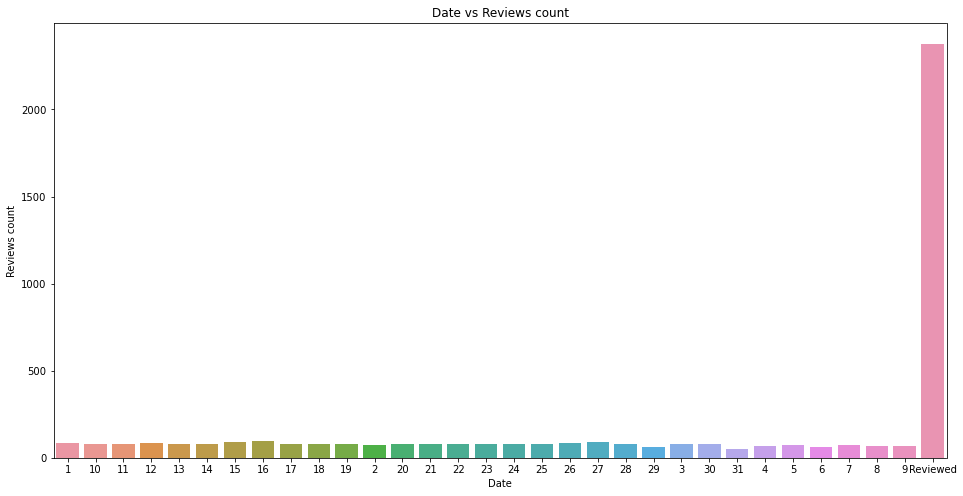

In [157]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('object')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

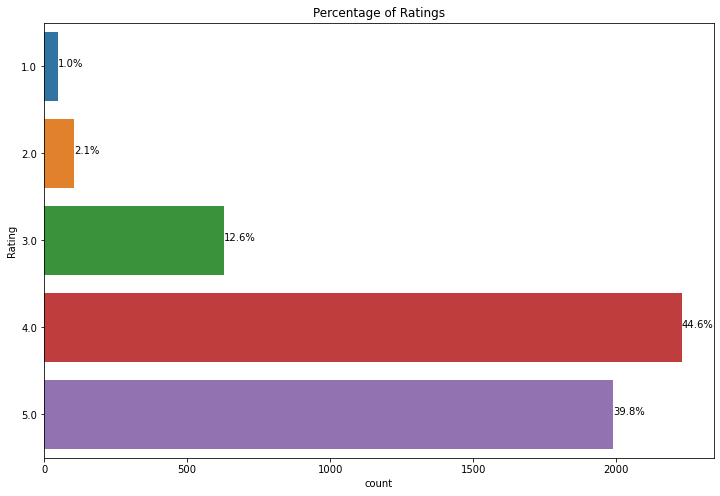

In [158]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

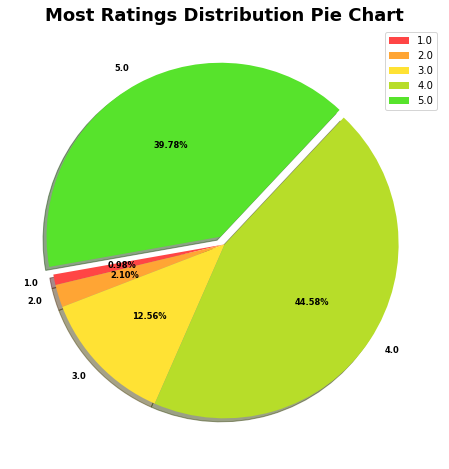

In [159]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

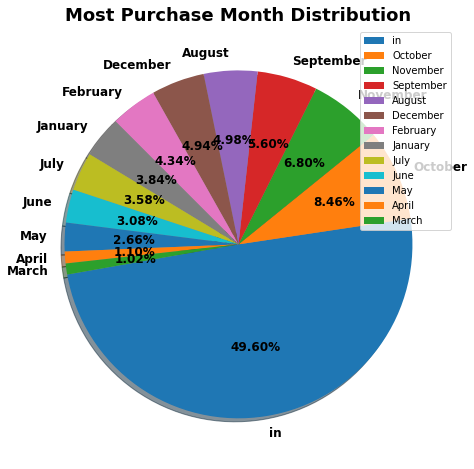

In [160]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

# For Sentiment Analysis

Keeping the DataFrame intact and each review separate from each other

In [161]:
data1 = df[['Review']]
data1

Review
0     I've purchased the 6GB version of this phone w...
1     This is definitely a budget branded phone 📱 af...
2     I will try to keep this review short. This rev...
3     I bought the phone in Jan 2023 @ 18250. Below ...
4     Performance up to the mark👍, If you do more ga...
...                                                 ...
4995                                       Working good
4996  The phone is simply awosem!! If you want a smo...
4997                        Good phone with low budget.
4998  Very fast, all sensors response are very nice,...
4999     Okay,redmi note 5 pro type of but battery good

[5000 rows x 1 columns]

In [162]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data1['Review'] = data1['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [163]:
data1

Review
0     i've purchased 6gb version phone comes extenda...
1     this definitely budget branded phone 📱 1 month...
2     i try keep review short. this review perspecti...
3     i bought phone jan 2023 @ 18250. below pros co...
4     performance mark👍, if gaming average, phone de...
...                                                 ...
4995                                       working good
4996  the phone simply awosem!! if want smooth fast ...
4997                             good phone low budget.
4998  very fast, sensors response nice, like screen ...
4999            okay,redmi note 5 pro type battery good

[5000 rows x 1 columns]

In [164]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data1))):
    cleaned= re.sub('[^a-zA-Z]', " ", data1["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [165]:
#Saving cleaned data to compare with original data, to check amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...

# Pre-processing 'Key Words'

In [166]:
#Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 



In [167]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [168]:
#Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)



Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [169]:
#Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)



Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [170]:
#dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)



Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [171]:
#resetting index since after removal of some rows, some index values are missing, which may cause problem in future operations.
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)



Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [172]:
#Removing Punctuations, Numbers and Special characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text



This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [173]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [174]:
#function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [175]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [176]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  \
0  I've purchased the 6GB version of this phone w...   
1  This is definitely a budget branded phone 📱 af...   
2  I will try to keep this review short. This rev...   
3  I bought the phone in Jan 2023 @ 18250. Below ...   
4  Performance up to the mark👍, If you do more ga...   
5  I like all the features as it is a budget phon...   
6  Absolutely the best smartphone with value for ...   
7  Beat phone gifted to wife. Good product and qu...   
8  It was good experence to shoping with amazon.....   
9                                      good product.   

                                    tokenized_tweets  
0  [purchased, gb, version, phone, come, extendab...  
1  [definitely, budget, branded, phone, month, da...  
2  [try, keep, review, short, review, perspective...  
3  [bought, phone, jan, pro, con, observed, pro, ...  
4  [performance, mark, gaming, average, phone, de...  
5  [like, feature, budget, phonepros, camera, pro...  
6  [absolutely, best, smartphone, value, money, f...  
7  [beat, phone, gifted, wife, good, product, qua...  
8  [good, experence, shoping, amazon, phone, ie, ...  
9                                    [good, product]

In [177]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [178]:
#removing stop words
import codecs
with codecs.open("Text Mining_Assignment 11", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])
    


,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,"I've purchased the 6GB v


In [179]:
stop.split(" ")

[',Rating,Title,Review,Review_Date\r\n0,4.0,Good',
 'phone-could',
 'have',
 'been',
 'better',
 '!,"I\'ve',
 'purchased',
 'the',
 '6GB',
 'version',
 'of',
 'this',
 'phone',
 'which',
 'comes',
 'with',
 'an',
 'extendable',
 '2',
 'GB',
 'RAM',
 '(virtual',
 'memory)',
 'capability.Good',
 'phone,',
 'but',
 'being',
 'the',
 'least',
 'expensive',
 'category',
 'offering',
 'from',
 'One-plus,',
 'there',
 'are',
 'some',
 'small',
 'evident',
 'points',
 'that',
 'will',
 'get',
 'noticed.',
 'First',
 'thing',
 'is',
 'the',
 'confusing',
 'placement',
 'of',
 'the',
 'power',
 'button',
 '(and',
 'hence',
 'the',
 'finger',
 'sensor).',
 'Daily',
 'handling',
 'of',
 'the',
 'mobile',
 'phone',
 'feels',
 'a',
 'bit',
 'annoying',
 'with',
 'fingers',
 'locking/un-locking',
 'the',
 'phone',
 'while',
 'you',
 'try',
 'to',
 'handle',
 'it',
 'and',
 'place',
 'it',
 'into',
 'Your',
 'pockets.',
 'Although',
 'this',
 'is',
 'not',
 'a',
 'big',
 'problem,',
 'it',
 'is',
 'st

In [180]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   
5  like feature budget phonepros camera processor...   
6  absolutely best smartphone value money fan one...   
7  beat phone gifted wife good product quality go...   
8  good experence shoping amazon phone ie one plu...   
9                                       good product   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I will try to keep this review short. This rev...  
3  I bought the phone in Jan 2023 @ 18250. Below ...  
4  Performance up to the mark👍, If you do more ga...  
5  I like all the features as it is a budget phon...  
6  Absolutely the best smartphone with value for ...  
7  Beat phone gifted to wife. Good product and qu...  
8  It was good experence to shoping with amazon.....  
9                                      good product.

In [181]:
TextBlob(dataframe['Clean_Reviews'][1]).words 

WordList(['definitely', 'budget', 'branded', 'phone', 'month', 'day', 'use', 'today', 'posting', 'review', 'got', 'phone', 'childrens', 'day', 'gift', 'father', 'pro', 'heavy', 'user', 'charge', 'stay', 'hour', 'otherwise', 'stay', 'almost', 'day', 'smooth', 'touch', 'issue', 'typing', 'anything', 'camera', 'quality', 'awesome', 'show', 'original', 'skin', 'texture', 'audio', 'quality', 'also', 'awesome', 'video', 'quality', 'wow', 'g', 'enable', 'clean', 'uicons', 'filter', 'lover', 'like', 'original', 'skin', 'texture', 'phone', 'phone', 'p', 'resolution', 'limited', 'g', 'band', 'hdr', 'support', 'netflix', 'amazon', 'prime', 'mean', 'viewing', 'experience', 'always', 'lag', 'behind'])

In [182]:
#tokenize Clean_Reviews
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)



0    [purchased, gb, version, phone, come, extendab...
1    [definitely, budget, branded, phone, month, da...
2    [try, keep, review, short, review, perspective...
3    [bought, phone, jan, pro, con, observed, pro, ...
4    [performance, mark, gaming, average, phone, de...
5    [like, feature, budget, phonepros, camera, pro...
6    [absolutely, best, smartphone, value, money, f...
7    [beat, phone, gifted, wife, good, product, qua...
8    [good, experence, shoping, amazon, phone, ie, ...
9                                      [good, product]
Name: Clean_Reviews, dtype: object

In [183]:
# Use English stemmer.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [184]:
#converting words to Stemmer
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx



stemmed
0     purchas gb version phone come extend gb ram vi...
1     definit budget brand phone month day use today...
2     tri keep review short review perspect averag u...
3     bought phone jan pro con observ pro lightweigh...
4     perform mark game averag phone definit must bu...
...                                                 ...
4943                                          work good
4944  phone simpli awosem want smooth fast phone bud...
4945                              good phone low budget
4946  fast sensor respons nice like screen refresh g...
4947              okay redmi note pro type batteri good

[4948 rows x 1 columns]

In [185]:
#converting words to lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy



[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


stemmed
0     purchased gb version phone come extendable gb ...
1     definitely budget branded phone month day use ...
2     try keep review short review perspective avera...
3     bought phone jan pro con observed pro lightwei...
4     performance mark gaming average phone definite...
...                                                 ...
4943                                       working good
4944  phone simply awosem want smooth fast phone bud...
4945                              good phone low budget
4946  fast sensor response nice like screen refresh ...
4947              okay redmi note pro type battery good

[4948 rows x 1 columns]

In [186]:
#Applying bag of Words without N grams
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)



In [187]:
print(cv.get_feature_names()[109:200])

['agni', 'ago', 'agree', 'ah', 'ahead', 'aheadof', 'ai', 'aince', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'ama', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingcamera', 'amazingly', 'amazingthis', 'amazon', 'amazone', 'amazonit', 'ambient', 'amd', 'amezing', 'amezingcharging', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amolad', 'amoled', 'amolid', 'among', 'amount', 'amountand', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'andthe', 'angel', 'angle', 'angry', 'animation', 'announce', 'announcement', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [188]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aanouncementcamera', 'aap', 'aapko', 'aaplog', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'acknowledge', 'across', 'act', 'activate', 'activated', 'activates', 'activity', 'actuaaly', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'additionally', 'addon', 'address', 'adequate', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adv

In [189]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [190]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [191]:
corpus[4]

'perform mark game averag phone definit must buy want buy camera centric phone look phone like vivo oppo rear camera also good selfi littl disappoint'

In [192]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,4))
X = cv.fit_transform(corpus).toarray()

In [193]:
X.shape

(4948, 5000)

In [194]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'abl use',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [195]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [196]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  ab  abl  abl use  absolut  accept  access  accessori  accha  \
0         0    0   0    0        0        0       0       0          0      0   
1         0    0   0    0        0        0       0       0          0      0   
2         0    0   0    0        0        0       0       0          0      0   
3         0    0   0    1        1        0       0       0          0      0   
4         0    0   0    0        0        0       0       0          0      0   
...     ...  ...  ..  ...      ...      ...     ...     ...        ...    ...   
4943      0    0   0    0        0        0       0       0          0      0   
4944      0    0   0    0        0        0       0       0          0      0   
4945      0    0   0    0        0        0       0       0          0      0   
4946      0    0   0    0        0        0       0       0          0      0   
4947      0    0   0    0        0        0       0       0          0      0   

      ...  year secur  year secur updat  yellow  yesterday  yet  youtub  \
0     ...           0                 0       0          0    0       0   
1     ...           0                 0       0          0    0       0   
2     ...           0                 0       0          0    0       1   
3     ...           0                 0       0          0    0       0   
4     ...           0                 0       0          0    0       0   
...   ...         ...               ...     ...        ...  ...     ...   
4943  ...           0                 0       0          0    0       0   
4944  ...           0                 0       0          0    0       0   
4945  ...           0                 0       0          0    0       0   
4946  ...           0                 0       0          0    0       0   
4947  ...           0                 0       0          0    0       0   

      youtub video  yr  zero  zoom  
0                0   0     0     0  
1                0   0     0     0  
2                0   0     0     0  
3                0   0     0     0  
4                0   0     0     0  
...            ...  ..   ...   ...  
4943             0   0     0     0  
4944             0   0     0     0  
4945             0   0     0     0  
4946             0   0     0     0  
4947             0   0     0     0  

[4948 rows x 5000 columns]

# TF-IDF Vectorizer

In [197]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [198]:
corpus[6]

'absolut best smartphon valu money fan oneplu alway want buy phone final got one delight mobil batteri backup excel standbi screen time use hour test play game sure give good experi camera qualiti good smoother write review use month'

In [199]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [200]:
X.shape

(4948, 5000)

In [201]:
tfidf_v.get_feature_names()[:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'ab',
 'abl',
 'abl use',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [202]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [203]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap   ab       abl   abl use  absolut  accept  access  accessori  \
0       0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
1       0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
2       0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
3       0.0  0.0  0.0  0.077048  0.096093      0.0     0.0     0.0        0.0   
4       0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
...     ...  ...  ...       ...       ...      ...     ...     ...        ...   
4943    0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
4944    0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
4945    0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
4946    0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   
4947    0.0  0.0  0.0  0.000000  0.000000      0.0     0.0     0.0        0.0   

      accha  ...  year secur  year secur updat  yellow  yesterday  yet  \
0       0.0  ...         0.0               0.0     0.0        0.0  0.0   
1       0.0  ...         0.0               0.0     0.0        0.0  0.0   
2       0.0  ...         0.0               0.0     0.0        0.0  0.0   
3       0.0  ...         0.0               0.0     0.0        0.0  0.0   
4       0.0  ...         0.0               0.0     0.0        0.0  0.0   
...     ...  ...         ...               ...     ...        ...  ...   
4943    0.0  ...         0.0               0.0     0.0        0.0  0.0   
4944    0.0  ...         0.0               0.0     0.0        0.0  0.0   
4945    0.0  ...         0.0               0.0     0.0        0.0  0.0   
4946    0.0  ...         0.0               0.0     0.0        0.0  0.0   
4947    0.0  ...         0.0               0.0     0.0        0.0  0.0   

        youtub  youtub video   yr  zero  zoom  
0     0.000000           0.0  0.0   0.0   0.0  
1     0.000000           0.0  0.0   0.0   0.0  
2     0.077304           0.0  0.0   0.0   0.0  
3     0.000000           0.0  0.0   0.0   0.0  
4     0.000000           0.0  0.0   0.0   0.0  
...        ...           ...  ...   ...   ...  
4943  0.000000           0.0  0.0   0.0   0.0  
4944  0.000000           0.0  0.0   0.0   0.0  
4945  0.000000           0.0  0.0   0.0   0.0  
4946  0.000000           0.0  0.0   0.0   0.0  
4947  0.000000           0.0  0.0   0.0   0.0  

[4948 rows x 5000 columns]

# Named Entity Recognition (NER)

In [204]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [205]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [206]:
for token in doc_block[:50]:
    print(token,token.pos_)  

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [207]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['branded', 'phone', 'month', 'day', 'use', 'today', 'posting', 'review', 'got', 'phone', 'childrens', 'day', 'gift', 'father', 'user', 'charge', 'stay', 'hour', 'stay', 'day', 'touch', 'issue', 'typing', 'camera', 'quality', 'show', 'skin', 'texture', 'quality', 'video', 'quality', 'uicons', 'skin', 'texture', 'phone', 'phone', 'p', 'resolution', 'limited', 'band', 'support', 'mean', 'viewing', 'experience', 'lag', 'try', 'keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time']


In [208]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2162
1       camera   1526
2      battery   1000
3      quality    899
4      product    500
5        price    481
6         life    339
7          day    337
8  performance    320
9     charging    299

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

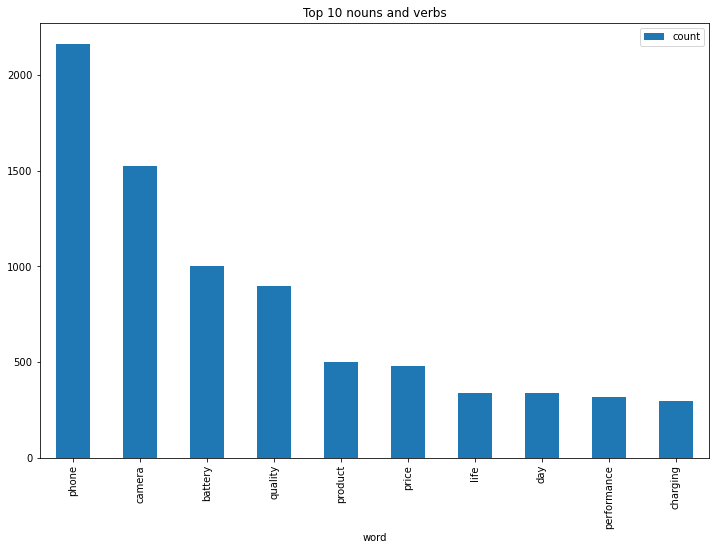

In [209]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1.Bag of words (Simple vectorization)

2.TF-IDF (Term Frequency - Inverse Document Frequency)

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

In [219]:
# Feature Extraction for 'Key Words'

# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#Fetching sentiments

To proceed further, we need to know the sentiment type of every review, that can be done using two ways:

a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)

b. Using TextBlob

In [220]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# Using NLTK's SentimentIntensityAnalyzer

In [228]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [229]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4564
neg            384

In [230]:
dataframe.Clean_Reviews[4]

'performance mark gaming average phone definitely must buy want buy camera centric phone look phone like vivo oppo rear camera also good selfie little disappointing'

In [231]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[4])

{'neg': 0.09, 'neu': 0.619, 'pos': 0.291, 'compound': 0.6697}

In [232]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   

                                              scores  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
1  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
3  {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...  
4  {'neg': 0.09, 'neu': 0.619, 'pos': 0.291, 'com...

In [233]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   

                                              scores  compound  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
1  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
3  {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...    0.9908  
4  {'neg': 0.09, 'neu': 0.619, 'pos': 0.291, 'com...    0.6697

In [234]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     purchased gb version phone come extendable gb ...   
1     definitely budget branded phone month day use ...   
2     try keep review short review perspective avera...   
3     bought phone jan pro con observed pro lightwei...   
4     performance mark gaming average phone definite...   
...                                                 ...   
4943                                       working good   
4944  phone simply awosem want smooth fast phone bud...   
4945                              good phone low budget   
4946  fast sensor response nice like screen refresh ...   
4947              okay redmi note pro type battery good   

                                                 scores  compound sentiment  
0     {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
1     {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  Positive  
2     {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
3     {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...    0.9908  Positive  
4     {'neg': 0.09, 'neu': 0.619, 'pos': 0.291, 'com...    0.6697  Positive  
...                                                 ...       ...       ...  
4943  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404  Positive  
4944  {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...    0.0772  Positive  
4945  {'neg': 0.3, 'neu': 0.286, 'pos': 0.414, 'comp...    0.2023  Positive  
4946  {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...    0.8020  Positive  
4947  {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...    0.5859  Positive  

[4948 rows x 4 columns]

In [235]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [236]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

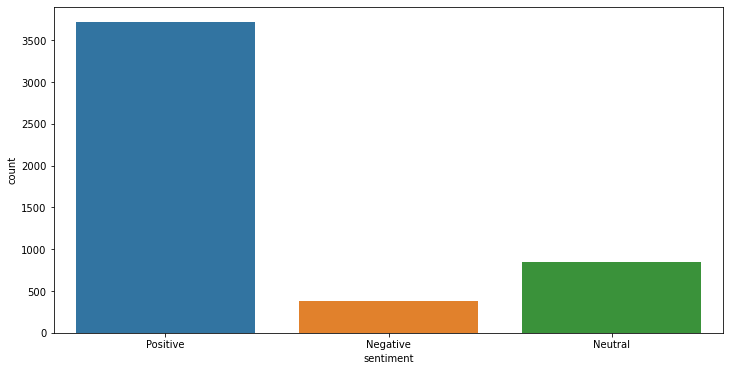

In [237]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

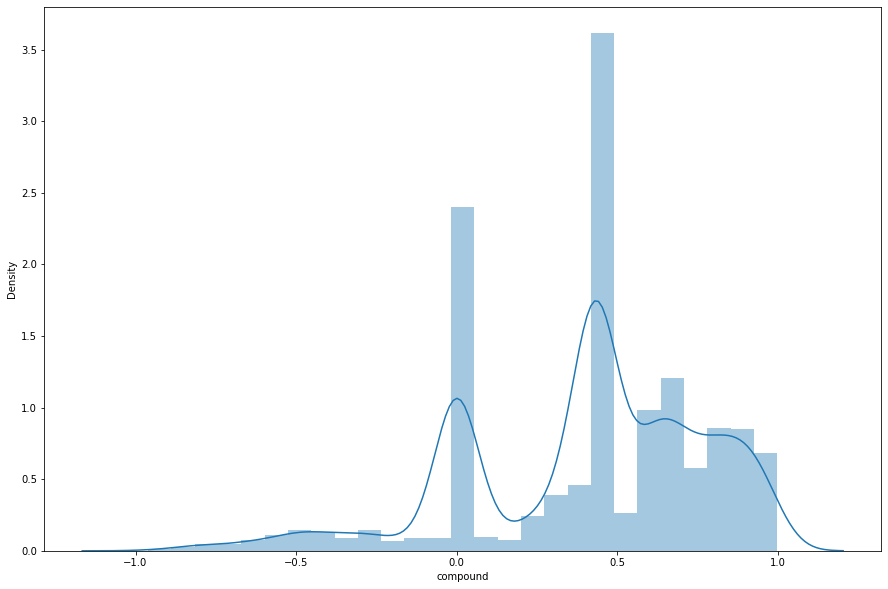

In [238]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [239]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  purchased gb version phone come extendable gb ...         165
1  definitely budget branded phone month day use ...          73
2  try keep review short review perspective avera...         112
3  bought phone jan pro con observed pro lightwei...         123
4  performance mark gaming average phone definite...          25

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

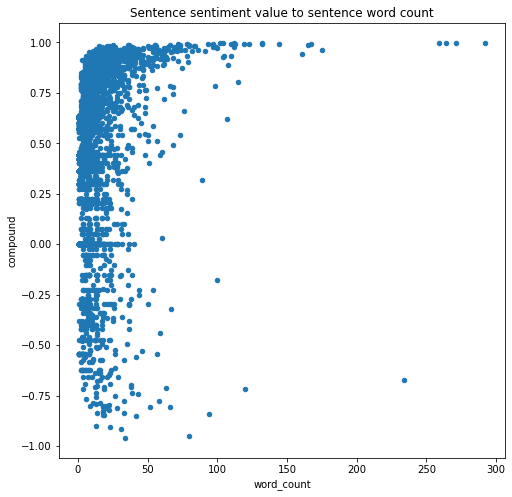

In [240]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [241]:
!pip install sentiment

In [242]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556  
1  This is definitely a budget branded phone 📱 af...      0.685863  0.219395  
2  I will try to keep this review short. This rev...      0.498519  0.169769  
3  I bought the phone in Jan 2023 @ 18250. Below ...      0.541389  0.357222  
4  Performance up to the mark👍, If you do more ga...      0.466667 -0.039583

Text(0, 0.5, 'Subjectivity')

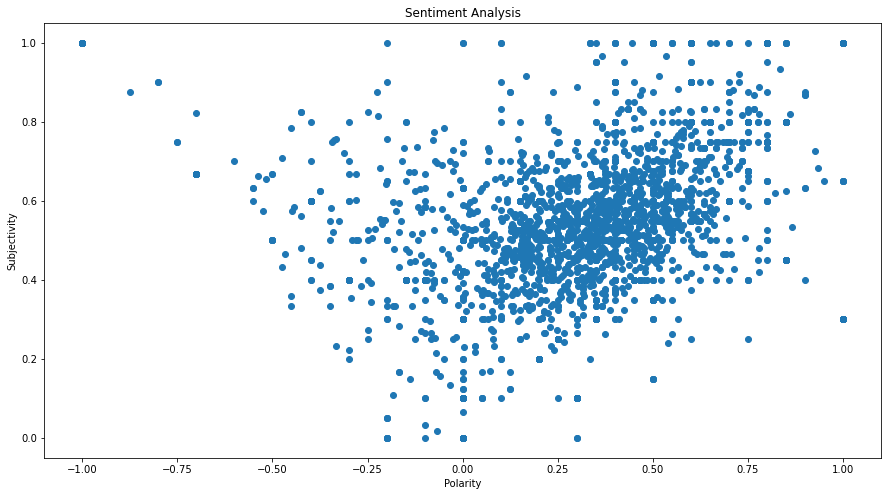

In [243]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [244]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [246]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("Text Mining_Assignment 11",index=False)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  try keep review short review perspective avera...   
3  bought phone jan pro con observed pro lightwei...   
4  performance mark gaming average phone definite...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556   
1  This is definitely a budget branded phone 📱 af...      0.685863  0.219395   
2  I will try to keep this review short. This rev...      0.498519  0.169769   
3  I bought the phone in Jan 2023 @ 18250. Below ...      0.541389  0.357222   
4  Performance up to the mark👍, If you do more ga...      0.466667 -0.039583   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

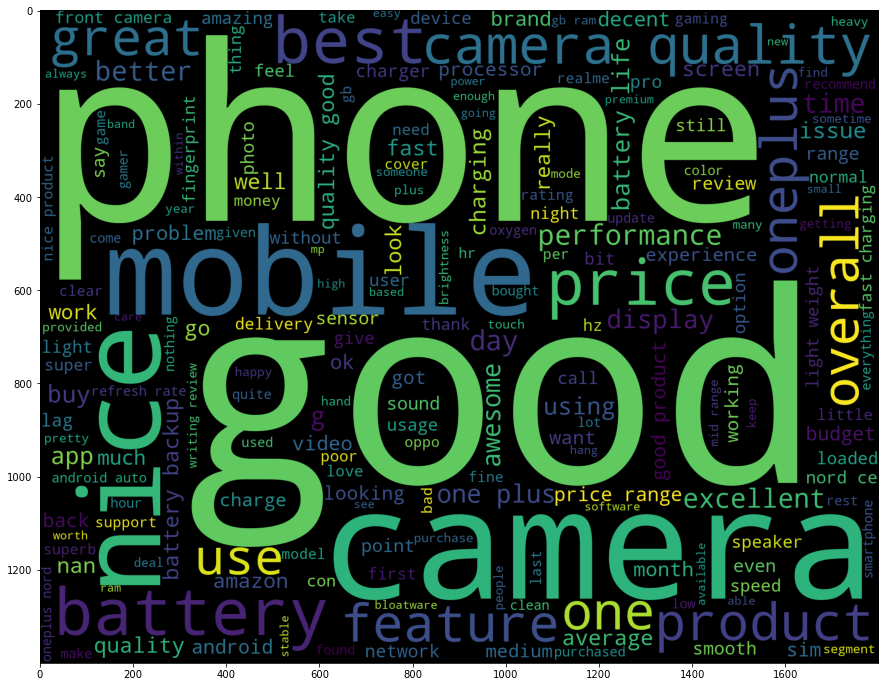

In [247]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

# Most common words in positive Review

In [248]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

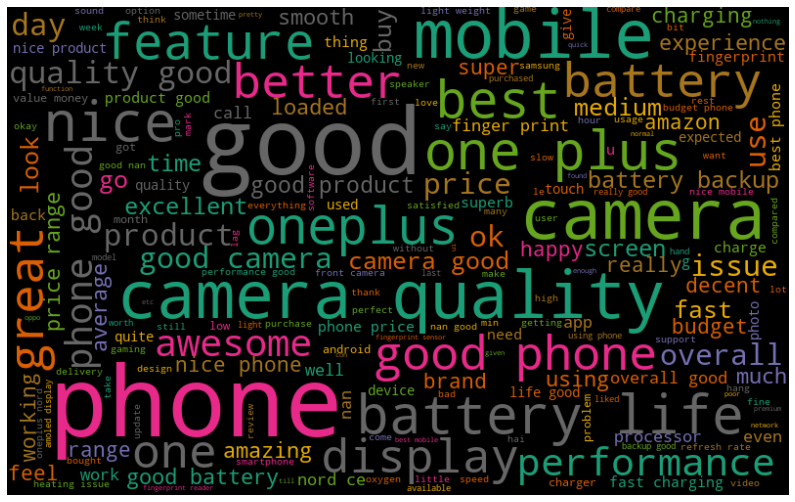

In [249]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# Most common words in negative Review

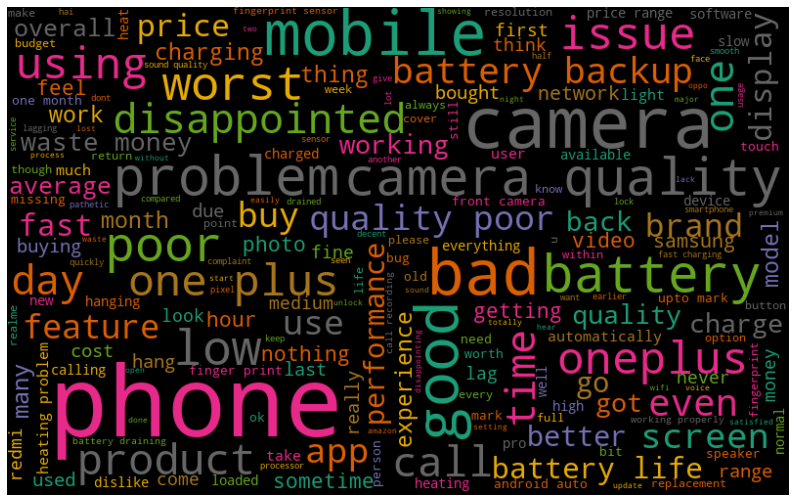

In [250]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)